# WeatherPy

---

## Starter Code to Generate Random Geographic Coordinates and a List of Cities

In [226]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress
from scipy import stats

# Impor the OpenWeatherMap API key
from api_keys import weather_api_key

# Import citipy to determine the cities based on latitude and longitude
from citipy import citipy

### Generate the Cities List by Using the `citipy` Library

In [227]:
# Empty list for holding the latitude and longitude combinations
lat_lngs = []

# Empty list for holding the cities names
cities = []

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name

    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
print(f"Number of cities in the list: {len(cities)}")

Number of cities in the list: 618


---

## Requirement 1: Create Plots to Showcase the Relationship Between Weather Variables and Latitude

### Use the OpenWeatherMap API to retrieve weather data from the cities list generated in the started code

In [228]:
# Set the API base URL
url = "https://api.openweathermap.org/data/2.5/weather" # YOUR CODE HERE

# Define an empty list to fetch the weather data for each city
city_data = []

# Print to logger
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters
record_count = 1
set_count = 1

# Loop through all the cities in our list to fetch weather data
for i, city in enumerate(cities):

    # Group cities in sets of 50 for logging purposes
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 0

    # Create endpoint URL with each city
    city_url = {
        "q": city,
        "appid": weather_api_key
    }

    response = requests.get(url, params=city_url).json()
    
    if 'coord' in response:
        latitude = response['coord']['lat']
        longitude = response['coord']['lon']
        one_call_url = f"https://api.openweathermap.org/data/2.5/weather?lat={latitude}&lon={longitude}&appid={weather_api_key}"
        
    pass # Skip to the next city

    #one_call_url = f"https://api.openweathermap.org/data/2.5/weather?lat={latitude}&lon={longitude}&appid={weather_api_key}"

# YOUR CODE HERE

    # Log the url, record, and set numbers
    print("Processing Record %s of Set %s | %s" % (record_count, set_count, city))

    # Add 1 to the record count
    record_count += 1

    # Run an API request for each of the cities
    try:
        # Parse the JSON and retrieve data
        city_weather = response = requests.get(one_call_url).json()

        # Parse out latitude, longitude, max temp, humidity, cloudiness, wind speed, country, and date
        city_lat = response['coord']['lat']
        city_lng = response['coord']['lon']
        city_max_temp = response['main']['temp_max']
        city_humidity = response['main']['humidity']
        city_clouds = response['clouds']['all']
        city_wind = response['wind']['speed']
        city_country = response['sys']['country']
        city_date = response['dt']

        # Append the City information into city_data list
        city_data.append({"City": city,
                          "Lat": city_lat,
                          "Lng": city_lng,
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

    # If an error is experienced, skip the city
    except KeyError as e:
        print(f"Error processing {city}: {e}")
        print("City not found. Skipping...")
        print("Response data:")
        print(response)
    

    # pause to avoid rate limiting
    time.sleep(1)

    # Indicate that Data Loading is complete
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")

Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 1 | waitangi
Processing Record 2 of Set 1 | papatowai
Processing Record 3 of Set 1 | edinburgh of the seven seas
Processing Record 4 of Set 1 | tbilisskaya
Processing Record 5 of Set 1 | kimbe
Processing Record 6 of Set 1 | 'ohonua
Processing Record 7 of Set 1 | albany
Processing Record 8 of Set 1 | blackmans bay
Processing Record 9 of Set 1 | taiohae
Processing Record 10 of Set 1 | coquimbo
Processing Record 11 of Set 1 | ploneour-lanvern
Processing Record 12 of Set 1 | ola
Processing Record 13 of Set 1 | isafjordur
Processing Record 14 of Set 1 | belyy yar
Processing Record 15 of Set 1 | hermanus
Processing Record 16 of Set 1 | yelizovo
Processing Record 17 of Set 1 | port elizabeth
Processing Record 18 of Set 1 | tilaran
Processing Record 19 of Set 1 | west island
Processing Record 20 of Set 1 | port-aux-francais
Processing Record 21 of Set 1 | adamstown
Processing Record 22 of Set 1 | jinchang
Pr

In [229]:
# Convert the cities weather data into a Pandas DataFrame
city_data_df = pd.DataFrame(city_data) # YOUR CODE HERE
city_data_df["Max Temp"] = city_data_df["Max Temp"] - 273.15
# Show Record Count
city_data_df.count()

City          618
Lat           618
Lng           618
Max Temp      618
Humidity      618
Cloudiness    618
Wind Speed    618
Country       618
Date          618
dtype: int64

In [230]:
# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,waitangi,-43.9535,-176.5597,13.23,90,100,5.81,NZ,1724455828
1,papatowai,-46.5619,169.4708,10.41,59,35,7.18,NZ,1724455829
2,edinburgh of the seven seas,-37.0676,-12.3116,12.16,79,75,10.15,SH,1724455830
3,tbilisskaya,45.3633,40.1900,20.11,80,0,2.45,RU,1724455832
4,kimbe,-5.5502,150.1429,30.26,60,93,3.21,PG,1724455833


In [231]:
# Export the City_Data into a csv
city_data_df.to_csv("../output_data/cities.csv", index_label="City_ID")

In [232]:
# Read saved data
city_data_df = pd.read_csv("../output_data/cities.csv", index_col="City_ID")

# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,waitangi,-43.9535,-176.5597,13.23,90,100,5.81,NZ,1724455828
1,papatowai,-46.5619,169.4708,10.41,59,35,7.18,NZ,1724455829
2,edinburgh of the seven seas,-37.0676,-12.3116,12.16,79,75,10.15,SH,1724455830
3,tbilisskaya,45.3633,40.1900,20.11,80,0,2.45,RU,1724455832
4,kimbe,-5.5502,150.1429,30.26,60,93,3.21,PG,1724455833


### Create the Scatter Plots Requested

#### Latitude Vs. Temperature

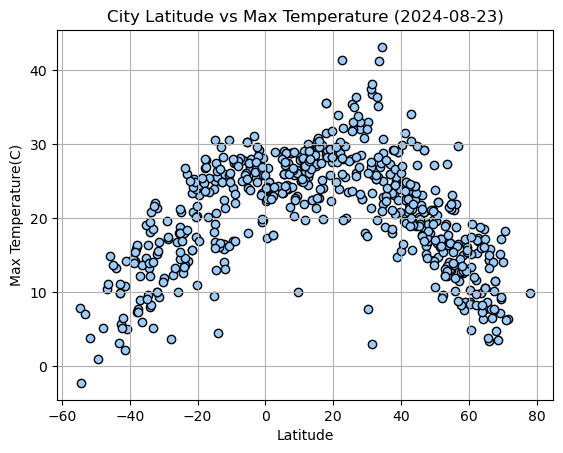

In [233]:
# Build scatter plot for latitude vs. temperature
lat = city_data_df["Lat"]
max_temp = city_data_df["Max Temp"]

plt.scatter(lat, max_temp, marker="o", facecolors="#99CCFF", edgecolors="black")
# YOUR CODE HERE

# Incorporate the other graph properties
plt.title("City Latitude vs Max Temperature (2024-08-23)")

plt.grid()

plt.xlabel("Latitude")
plt.ylabel("Max Temperature(C)")
# YOUR CODE HERE

# Save the figure
plt.savefig("../output_data/Fig1.png")

# Show plot
plt.show()

#### Latitude Vs. Humidity

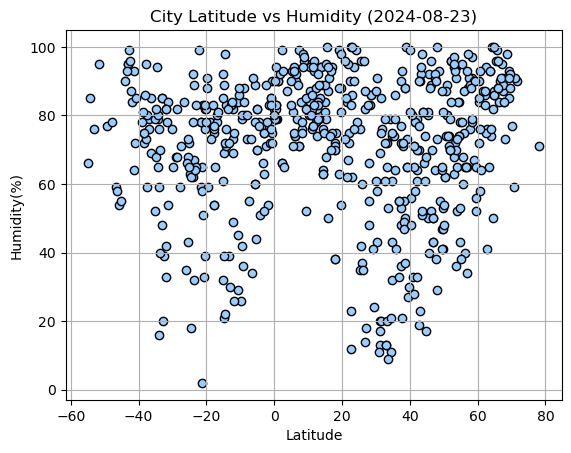

In [234]:
# Build the scatter plots for latitude vs. humidity
lat = city_data_df["Lat"]
humidity = city_data_df["Humidity"]

plt.scatter(lat, humidity, marker="o", facecolors="#99CCFF", edgecolors="black")
# YOUR CODE HERE

# Incorporate the other graph properties
plt.title("City Latitude vs Humidity (2024-08-23)")

plt.grid()

plt.xlabel("Latitude")
plt.ylabel("Humidity(%)")
# YOUR CODE HERE

# Save the figure
plt.savefig("../output_data/Fig2.png")

# Show plot
plt.show()

#### Latitude Vs. Cloudiness

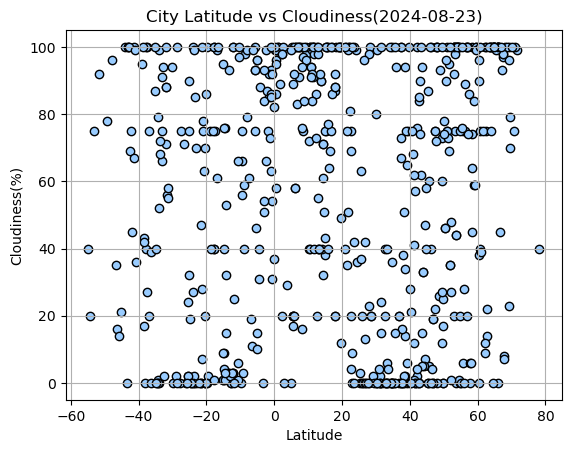

In [235]:
# Build the scatter plots for latitude vs. cloudiness
lat = city_data_df["Lat"]
cloudiness = city_data_df["Cloudiness"]

plt.scatter(lat, cloudiness, marker="o", facecolors="#99CCFF", edgecolors="black")
# YOUR CODE HERE

# Incorporate the other graph properties
plt.title("City Latitude vs Cloudiness(2024-08-23)")

plt.grid()

plt.xlabel("Latitude")
plt.ylabel("Cloudiness(%)")
# YOUR CODE HERE

# Save the figure
plt.savefig("../output_data/Fig3.png")

# Show plot
plt.show()

#### Latitude vs. Wind Speed Plot

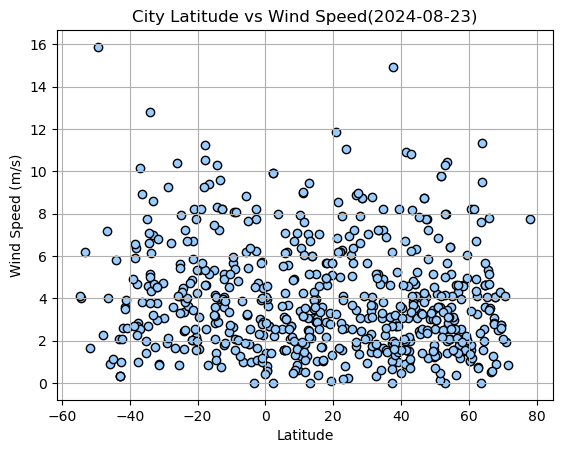

In [236]:
# Build the scatter plots for latitude vs. wind speed
lat = city_data_df["Lat"]
wind_speed = city_data_df["Wind Speed"]

plt.scatter(lat, wind_speed, marker="o", facecolors="#99CCFF", edgecolors="black")
# YOUR CODE HERE

# Incorporate the other graph properties
plt.title("City Latitude vs Wind Speed(2024-08-23)")

plt.grid()

plt.xlabel("Latitude")
plt.ylabel("Wind Speed (m/s)")
# YOUR CODE HERE

# Save the figure
plt.savefig("../output_data/Fig4.png")

# Show plot
plt.show()

---

## Requirement 2: Compute Linear Regression for Each Relationship


In [237]:
# Define a function to create Linear Regression plots
equation = ""
def plot_linear_regression(df, x_col, y_col, title, x_label, y_label):
    global equation
    # Perform linear regression
    slope, intercept, r_value, p_value, std_err = stats.linregress(df[x_col], df[y_col])

    # Calculate R-squared
    r_squared = r_value**2
    print(f"The r^2-value is: {r_squared}")

    # Create scatter plot
    plt.scatter(df[x_col], df[y_col], facecolors="#99CCFF", edgecolors="black")

    # Plot the regression line
    plt.plot(df[x_col], slope * df[x_col] + intercept, color='r')

    # Add the equation of the linear regression line to the plot
    equation = f"y = {slope:.2f}x + {intercept:.2f}"

    # Add labels and title
    plt.xlabel(x_label)
    plt.ylabel(y_label)
    plt.title(title)


# YOUR CODE HERE

In [238]:
# Create a DataFrame with the Northern Hemisphere data (Latitude >= 0)
northern_hemi_df = city_data_df[city_data_df['Lat'] >= 0]
# YOUR CODE HERE

# Display sample data
northern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
3,tbilisskaya,45.3633,40.1900,20.11,80,0,2.45,RU,1724455832
6,albany,42.6001,-73.9662,23.23,70,84,1.99,US,1724455835
10,ploneour-lanvern,47.9000,-4.2833,19.18,100,100,7.20,FR,1724455841
11,ola,59.5833,151.2833,16.15,52,100,6.04,RU,1724455842
12,isafjordur,66.0755,-23.1240,3.32,96,100,7.81,IS,1724455843


In [239]:
# Create a DataFrame with the Southern Hemisphere data (Latitude < 0)
southern_hemi_df = city_data_df[city_data_df['Lat'] < 0]
# YOUR CODE HERE

# Display sample data
southern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,waitangi,-43.9535,-176.5597,13.23,90,100,5.81,NZ,1724455828
1,papatowai,-46.5619,169.4708,10.41,59,35,7.18,NZ,1724455829
2,edinburgh of the seven seas,-37.0676,-12.3116,12.16,79,75,10.15,SH,1724455830
4,kimbe,-5.5502,150.1429,30.26,60,93,3.21,PG,1724455833
5,'ohonua,-5.5502,150.1429,30.26,60,93,3.21,PG,1724455833


###  Temperature vs. Latitude Linear Regression Plot

The r^2-value is: 0.46073547349393323


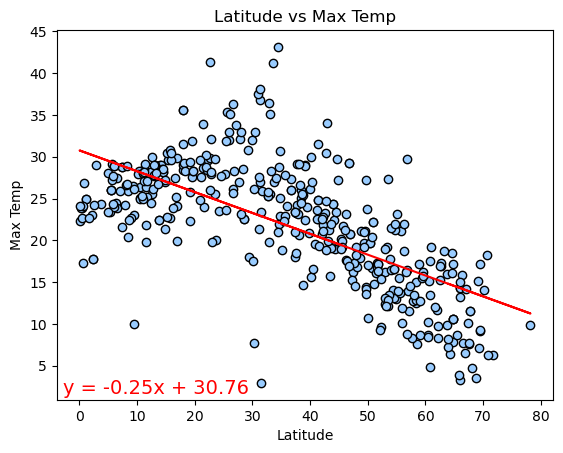

In [240]:
# Linear regression on Northern Hemisphere
plot_linear_regression(northern_hemi_df, 'Lat', 'Max Temp', 'Latitude vs Max Temp', 'Latitude', 'Max Temp')
plt.text(.2, .03, equation, color='red', fontsize=14, ha='center', va='center', transform=plt.gca().transAxes)
plt.show()
# YOUR CODE HERE

The r^2-value is: 0.5973487032569378


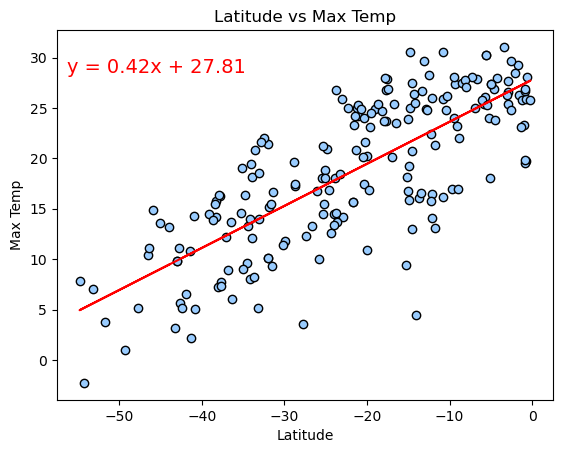

In [241]:
# Linear regression on Southern Hemisphere
plot_linear_regression(southern_hemi_df, 'Lat', 'Max Temp', 'Latitude vs Max Temp', 'Latitude', 'Max Temp')
plt.text(.2, .9, equation, color='red', fontsize=14, ha='center', va='center', transform=plt.gca().transAxes)
plt.show()
# YOUR CODE HERE

**Discussion about the linear relationship:** 
In the plot showing the linear regression line for the Northern Hemisphere, you can see temperatures fall the further you get from the 0 latitude line. You can see the same trend in the plot showing the linear regression for the Southern Hemisphere. This shows us that the further you are from the equator, the lower the max temp is expected to be. The closer you are to the equator, the higher the max temp will be.

### Humidity vs. Latitude Linear Regression Plot

The r^2-value is: 0.002671635285485635


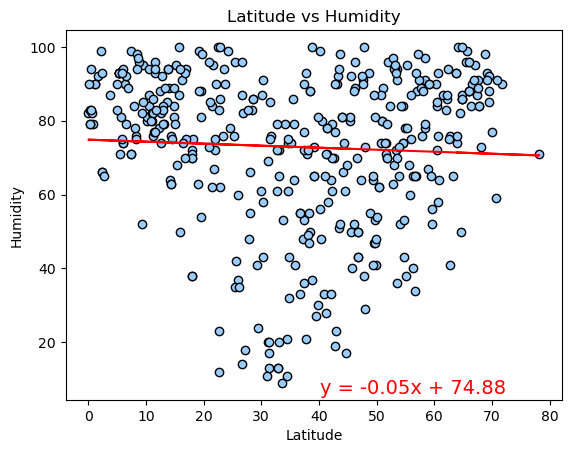

In [242]:
# Northern Hemisphere
plot_linear_regression(northern_hemi_df, 'Lat', 'Humidity', 'Latitude vs Humidity', 'Latitude', 'Humidity')
plt.text(.7, .03, equation, color='red', fontsize=14, ha='center', va='center', transform=plt.gca().transAxes)
plt.show()
# YOUR CODE HERE

The r^2-value is: 0.005436016914223837


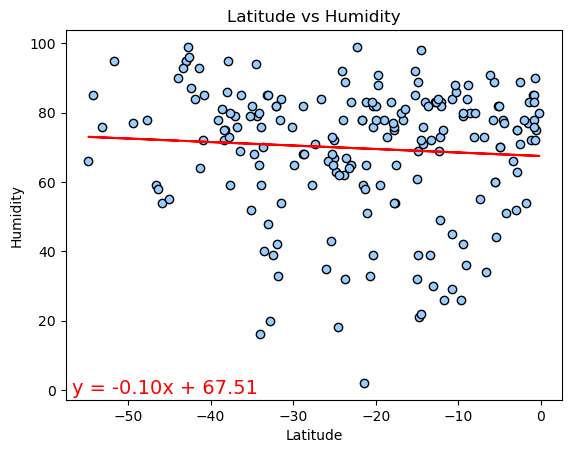

In [243]:
# Southern Hemisphere
plot_linear_regression(southern_hemi_df, 'Lat', 'Humidity', 'Latitude vs Humidity', 'Latitude', 'Humidity')
plt.text(.2, .03, equation, color='red', fontsize=14, ha='center', va='center', transform=plt.gca().transAxes)
plt.show()

# YOUR CODE HERE

**Discussion about the linear relationship:** The results of both the Northern Hemisphere and Southern Hemisphere plots show us that Latitude doesn't have much effect on the humidity of a location. You have more varying humidity in between the equator and the poles. The equator and the poles tend to have higher humidities though.

### Cloudiness vs. Latitude Linear Regression Plot

The r^2-value is: 0.002277964082797591


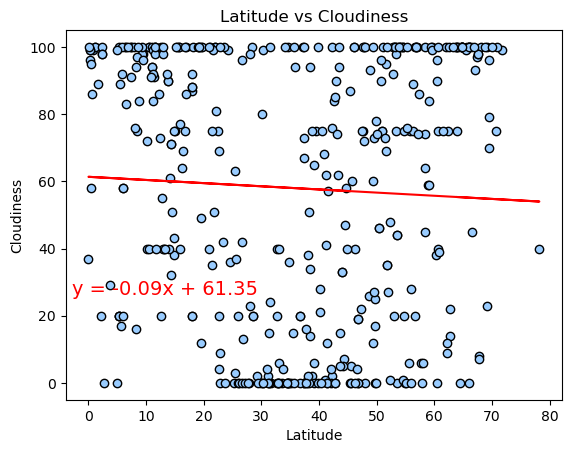

In [244]:
# Northern Hemisphere
plot_linear_regression(northern_hemi_df, 'Lat', 'Cloudiness', 'Latitude vs Cloudiness', 'Latitude', 'Cloudiness')
plt.text(.2, .3, equation, color='red', fontsize=14, ha='center', va='center', transform=plt.gca().transAxes)
plt.show()
# YOUR CODE HERE

The r^2-value is: 0.0009685014016094692


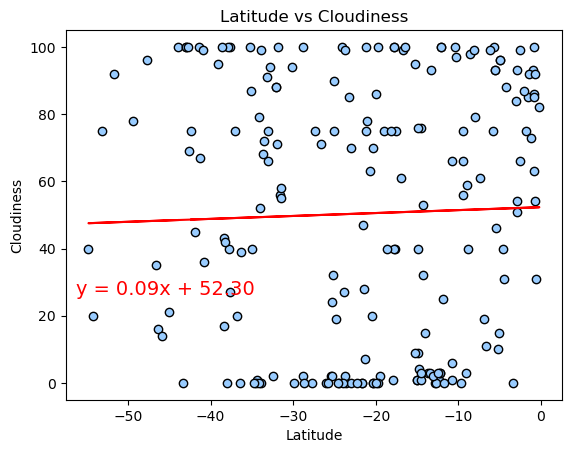

In [245]:
# Southern Hemisphere
plot_linear_regression(southern_hemi_df, 'Lat', 'Cloudiness', 'Latitude vs Cloudiness', 'Latitude', 'Cloudiness')
plt.text(.2, .3, equation, color='red', fontsize=14, ha='center', va='center', transform=plt.gca().transAxes)
plt.show()
# YOUR CODE HERE

**Discussion about the linear relationship:** 
The Northern Hemisphere plot shows us that cloudiness tends to increase as you get closer to the 0 latitude line. In the Southern Hemisphere plot, we can see the same results. 

### Wind Speed vs. Latitude Linear Regression Plot

The r^2-value is: 0.0007371492267350293


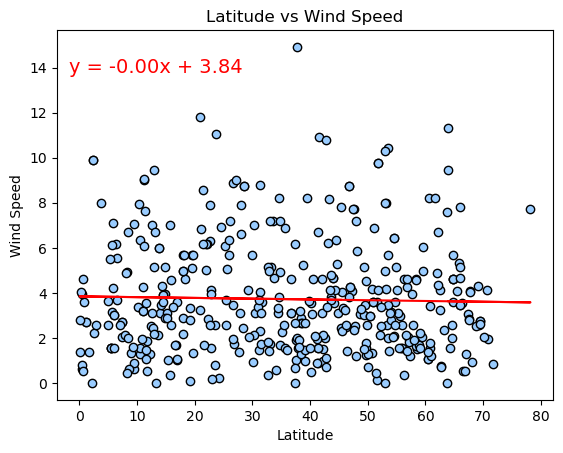

In [246]:
# Northern Hemisphere
plot_linear_regression(northern_hemi_df, 'Lat', 'Wind Speed', 'Latitude vs Wind Speed', 'Latitude', 'Wind Speed')
plt.text(.2, .9, equation, color='red', fontsize=14, ha='center', va='center', transform=plt.gca().transAxes)
plt.show()
# YOUR CODE HERE

The r^2-value is: 0.0010049215812931234


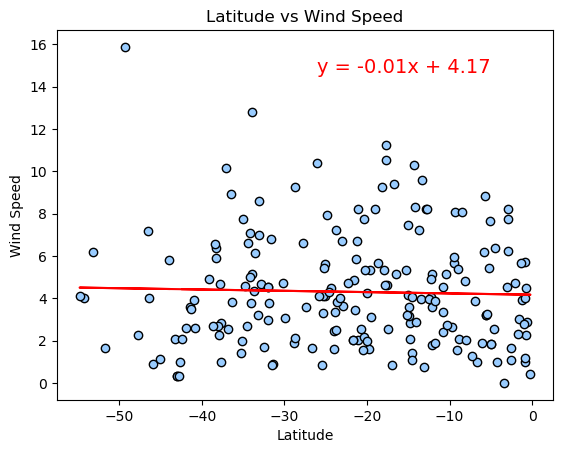

In [247]:
# Southern Hemisphere
plot_linear_regression(southern_hemi_df, 'Lat', 'Wind Speed', 'Latitude vs Wind Speed', 'Latitude', 'Wind Speed')
plt.text(.7, .9, equation, color='red', fontsize=14, ha='center', va='center', transform=plt.gca().transAxes)
plt.show()
# YOUR CODE HERE

**Discussion about the linear relationship:** 
The results of both the Northern Hemisphere and the Southern Hemisphere plots seem to show that Latitude has little effect on the Wind Speed. It appears to trend slightly lower closer to the equator but not enough to be significant.